<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-2-Kaggle-Challenge/blob/master/YuanjinRen_LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
df.shape

(48818, 34)

In [0]:
df.head(5)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()


,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,"48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00","48,818.00"
mean,1.20,1.54,40.75,-73.97,"3,579.56",0.52,0.48,0.48,0.45,0.42,0.42,0.37,0.05,0.27,0.19,0.18,0.13,0.14,0.10,0.09,0.06,0.06,0.05,0.05,0.04,0.04,0.04,0.03,0.03
std,0.47,1.11,0.04,0.03,"1,762.42",0.50,0.50,0.50,0.50,0.49,0.49,0.48,0.22,0.44,0.39,0.38,0.34,0.35,0.30,0.28,0.24,0.23,0.22,0.21,0.20,0.20,0.19,0.16,0.16
min,0.00,0.00,40.57,-74.09,"1,375.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,40.73,-73.99,"2,500.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,40.75,-73.98,"3,150.00",1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,2.00,40.77,-73.95,"4,095.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,10.00,8.00,40.99,-73.70,"15,500.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [0]:
guess=df['price'].mean()   #find the baseline of price prediction
print('{:,.2f}'.format(guess))

3,579.56


In [0]:
errors = guess - df['price']
mean_absolute_error = errors.abs().mean()
mean_absolute_error

1201.5251847941586

In [0]:
print(f'If we just guessed the rent price for ${guess:,.0f},')
print(f'we would get ${mean_absolute_error:,.0f} error on average. ')

If we just guessed the rent price for $3,580,
we would get $1,202 error on average. 


In [0]:
import seaborn as sns

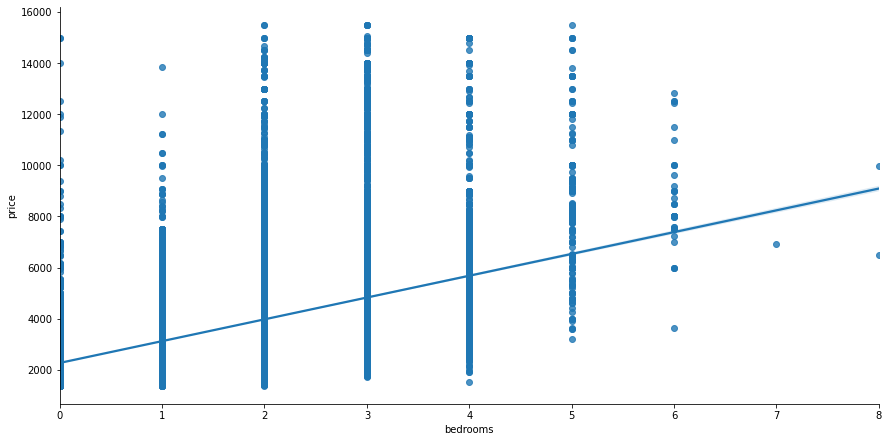

In [0]:
sns.pairplot(df,x_vars=['bedrooms'],y_vars=['price'],kind="reg",diag_kind="kde",height=6,aspect=2);   
# Explore relationship between bedrooms and rent price using seaborn

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()   #instantiate LinearRegression class

In [0]:
features = ['bedrooms']  #choose column 'bedrooms' as x variable or independent variable
target=['price']      #'price' column is going to be the y variable or dependent variable 

In [0]:
x_train = df[features]   #arrange data as training data, put them into dataframes seperately
y_train = df[target]
model.fit(x_train,y_train) #fit the model to data by calling fit method

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.coef_  #check the coefficient

array([[853.25416753]])

In [0]:
model.intercept_  #check the intercept

array([2267.97414918])

In [0]:
def predict(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  print(int(estimate), "is our estimated price for ", int(bedrooms), "bedrooms")
  print(int(coefficient), "is going to be added for each additional bedroom")

  return estimate, coefficient
  

In [0]:
print((predict(4)))

5680 is our estimated price for  4 bedrooms
853 is going to be added for each additional bedroom
(array([5680.99081929]), array([853.25416753]))
